In [2]:
import pandas as pd

In [3]:
ddb_in = pd.read_csv("bdd_in_mat_05.csv")
ddb_out = pd.read_csv("bdd_out_mat_05.csv")

In [4]:
print(ddb_in.info())
print(ddb_out.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Columns: 2000 entries, 0 to 0.241950844003532.25
dtypes: float64(1960), int64(40)
memory usage: 45.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Columns: 2000 entries, -9.83003134910548 to -3.51693894092698
dtypes: float64(2000)
memory usage: 45.8 MB
None


In [5]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
import networkx as nx

# Affichons d'abord les colonnes disponibles
print("Colonnes dans ddb_in :")
print(ddb_in.columns.tolist())
print("\nColonnes dans ddb_out :")
print(ddb_out.columns.tolist())

Colonnes dans ddb_in :
['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31', '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', '0.000660106711604325', '0.000660106711604325.1', '0.000660106711604325.2', '0.000660106711604325.3', '0.000660106711604325.4', '0.000660106711604325.5', '0.000660106711604325.6', '0.000660106711604325.7', '0.000660106711604325.8', '0.000660106711604325.9', '0.000660106711604325.10', '0.000660106711604325.11', '0.000660106711604325.12', '0.000660106711604325.13', '0.000660106711604325.14', '0.000660106711604325.15', '0.000660106711604325.16', '0.000660106711604325.17', '0.000660106711604325.18', '0.000660106711604325.19', '0.000660106711604325.20', '0.000660106711604325.21', '0.000660106711604325.22', '0.000660106711604325.23', '0.000660106711604325.24', '0.00

In [6]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
# --- Préparation des données ---
df_in_cleaned = ddb_in.copy()
df_out_cleaned = ddb_out.copy()

X = df_in_cleaned.to_numpy()
y = df_out_cleaned.to_numpy()

# Normalisation des entrées
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalisation des sorties
df_out_shifted = y - y[:, 0, np.newaxis]
global_max_abs_y = np.max(np.abs(df_out_shifted))
y_normalized = df_out_shifted / global_max_abs_y

# Reshape pour LSTM
n_samples_cleaned, n_timesteps = X_scaled.shape
X_reshaped = X_scaled.reshape(n_samples_cleaned, n_timesteps, 1)
y_reshaped = y_normalized.reshape(n_samples_cleaned, n_timesteps, 1)

# Split train/test
indices = np.arange(len(X_reshaped))
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_reshaped, y_reshaped, indices, test_size=0.2, random_state=42
)


In [8]:
# --- Construction du modèle LSTM ---
model = Sequential()
model.add(LSTM(64, input_shape=(n_timesteps, 1), return_sequences=True))
model.add(Dense(1))  # prédiction par timestep

model.compile(optimizer='adam', loss='mse')

# --- Entraînement ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

# --- Évaluation ---
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20


/Users/alicepare/Library/Mobile Documents/com~apple~CloudDocs/Documents/Centrale/S7/ST5/EI/Student_folder/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - loss: 2.1989e-04 - val_loss: 5.0613e-05
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - loss: 2.1989e-04 - val_loss: 5.0613e-05
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - loss: 1.3308e-04 - val_loss: 4.7790e-05
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - loss: 1.3308e-04 - val_loss: 4.7790e-05
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - loss: 1.3189e-04 - val_loss: 4.3255e-05
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - loss: 1.3189e-04 - val_loss: 4.3255e-05
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - loss: 1.2775e-04 - val_loss: 3.9799e-05
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - loss: 1.2775e-04 - val_loss: 3.9799e-05
Epoch 5/20
23/75 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 3.6966e-05

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)

# Remettre à l’échelle d’origine
y_pred_real = y_pred * global_max_abs_y
y_test_real = y_test * global_max_abs_y

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_real.flatten(), y_pred_real.flatten()))
print(f"RMSE: {rmse:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
(600, 2000, 1)
RMSE: 0.7162
(600, 2000, 1)
RMSE: 0.7162


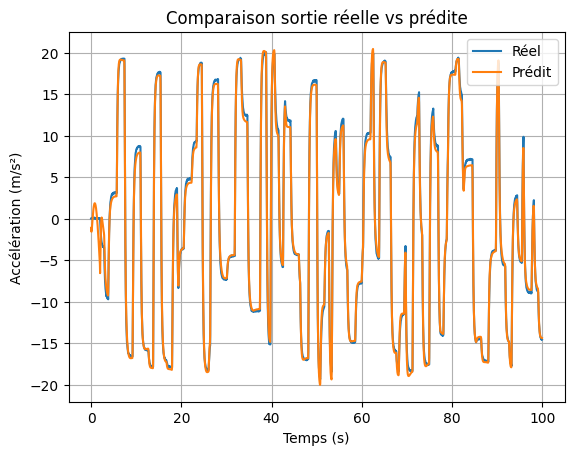

In [10]:
i = 100  # indice du sample à visualiser
# Définit dt si nécessaire
dt = 0.05

real = y_test_real[i].squeeze()
pred = y_pred_real[i].squeeze()

t = np.arange(len(real)) * dt

plt.plot(t, real, label="Réel")
plt.plot(t, pred, label="Prédit")
plt.legend()
plt.title("Comparaison sortie réelle vs prédite")
plt.xlabel("Temps (s)")
plt.ylabel("Accélération (m/s²)")
plt.grid(True)
plt.show()


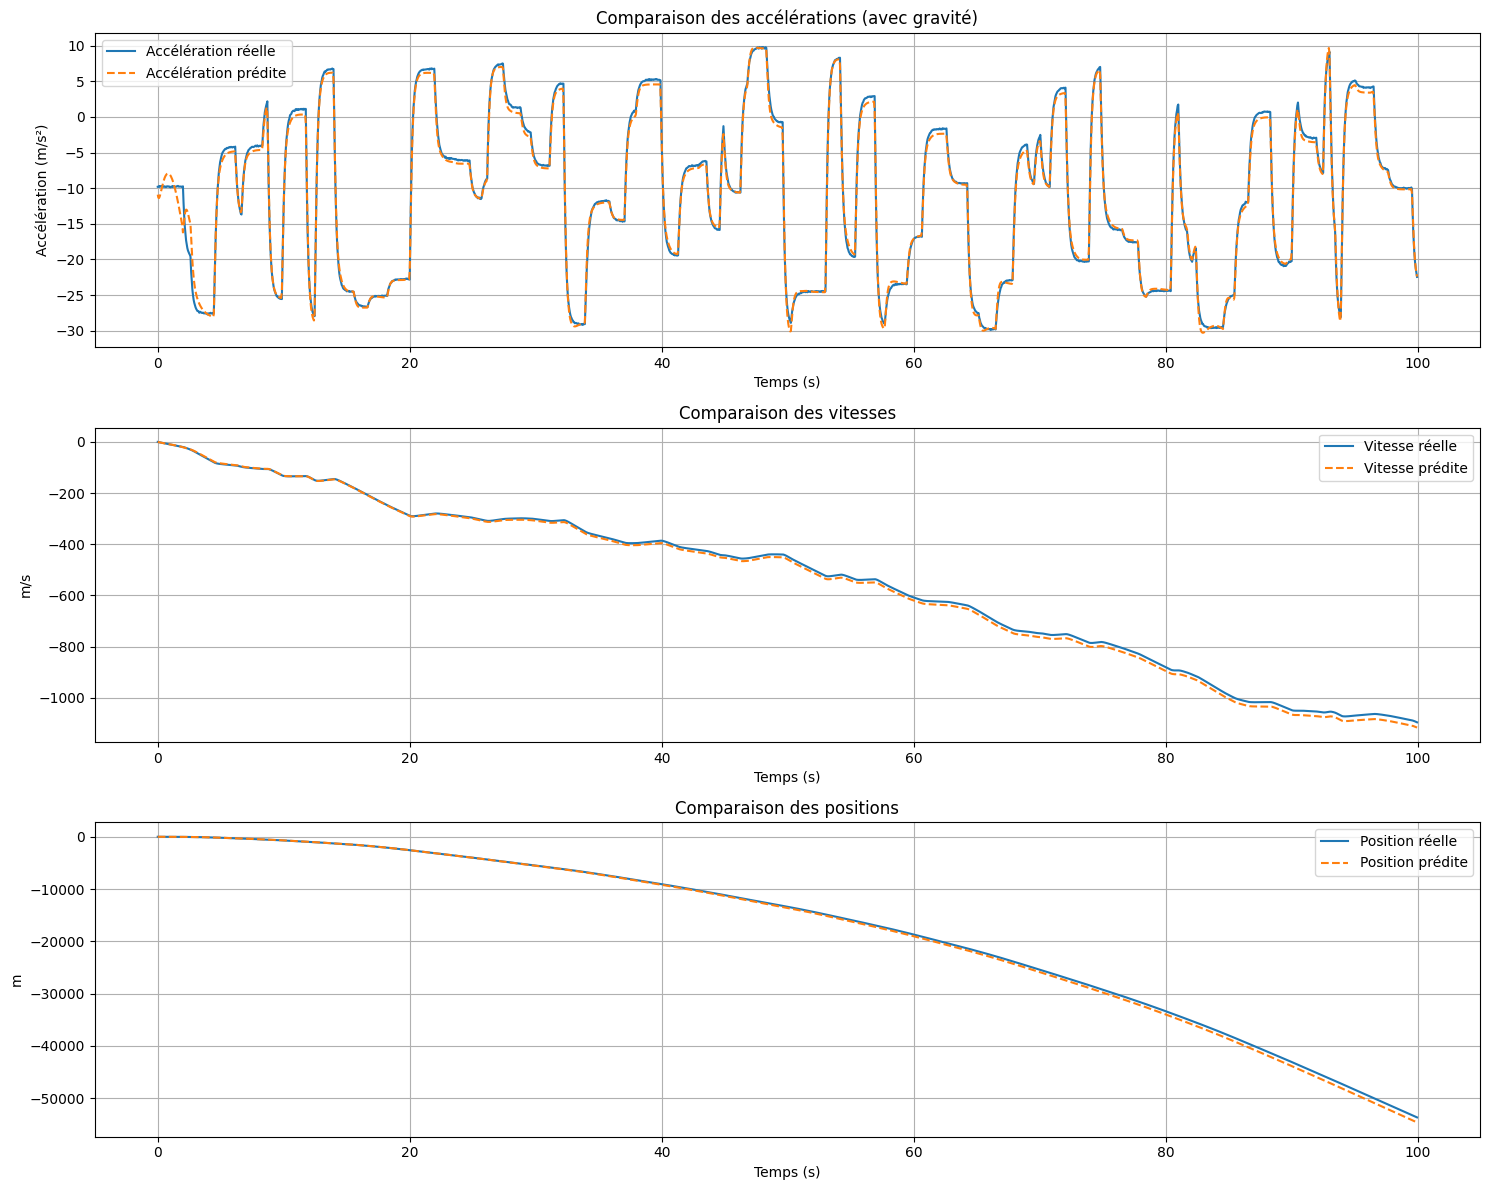

RMSE Accélération: 0.7413 m/s²
RMSE Vitesse: 11.6441 m/s
RMSE Position: 423.6874 m

Valeur initiale de l'accélération : -9.81 m/s²


In [12]:
# Sélectionner un exemple
i = 0   # vous pouvez changer cet indice

# Données réelles et prédites (dénormalisation complète)
real_acceleration = y_test_real[i].squeeze() + y[X_test.shape[0]:][i][0]  # Réajoute la valeur initiale
predicted_acceleration = y_pred_real[i].squeeze() + y[X_test.shape[0]:][i][0]  # Réajoute la même valeur initiale

# Fonction pour calculer la position à partir de l'accélération
def calculate_position(acceleration, dt=0.05):
    velocity = np.cumsum(acceleration) * dt
    position = np.cumsum(velocity) * dt
    return position, velocity

# Calculer les positions et vitesses
real_position, real_velocity = calculate_position(real_acceleration)
predicted_position, predicted_velocity = calculate_position(predicted_acceleration)

# time axis
t = np.arange(len(real_acceleration)) * dt

# Affichage des résultats
plt.figure(figsize=(15, 12))

# Accélération
plt.subplot(3, 1, 1)
plt.plot(t, real_acceleration, label='Accélération réelle')
plt.plot(t, predicted_acceleration, label='Accélération prédite', linestyle='--')
plt.legend()
plt.title('Comparaison des accélérations (avec gravité)')
plt.grid(True)
plt.ylabel('Accélération (m/s²)')
plt.xlabel('Temps (s)')

# Vitesse
plt.subplot(3, 1, 2)
plt.plot(t, real_velocity, label='Vitesse réelle')
plt.plot(t, predicted_velocity, label='Vitesse prédite', linestyle='--')
plt.legend()
plt.title('Comparaison des vitesses')
plt.grid(True)
plt.ylabel('m/s')
plt.xlabel('Temps (s)')

# Position
plt.subplot(3, 1, 3)
plt.plot(t, real_position, label='Position réelle')
plt.plot(t, predicted_position, label='Position prédite', linestyle='--')
plt.legend()
plt.title('Comparaison des positions')
plt.grid(True)
plt.ylabel('m')
plt.xlabel('Temps (s)')

plt.tight_layout()
plt.show()

# Calculer l'erreur RMS pour chaque variable
def calculate_rmse(real, pred):
    return np.sqrt(np.mean((real - pred) ** 2))

print(f"RMSE Accélération: {calculate_rmse(real_acceleration, predicted_acceleration):.4f} m/s²")
print(f"RMSE Vitesse: {calculate_rmse(real_velocity, predicted_velocity):.4f} m/s")
print(f"RMSE Position: {calculate_rmse(real_position, predicted_position):.4f} m")

# Afficher la valeur initiale de l'accélération pour vérification
print(f"\nValeur initiale de l'accélération : {y[X_test.shape[0]:][i][0]:.2f} m/s²")


Affichage des erreurs

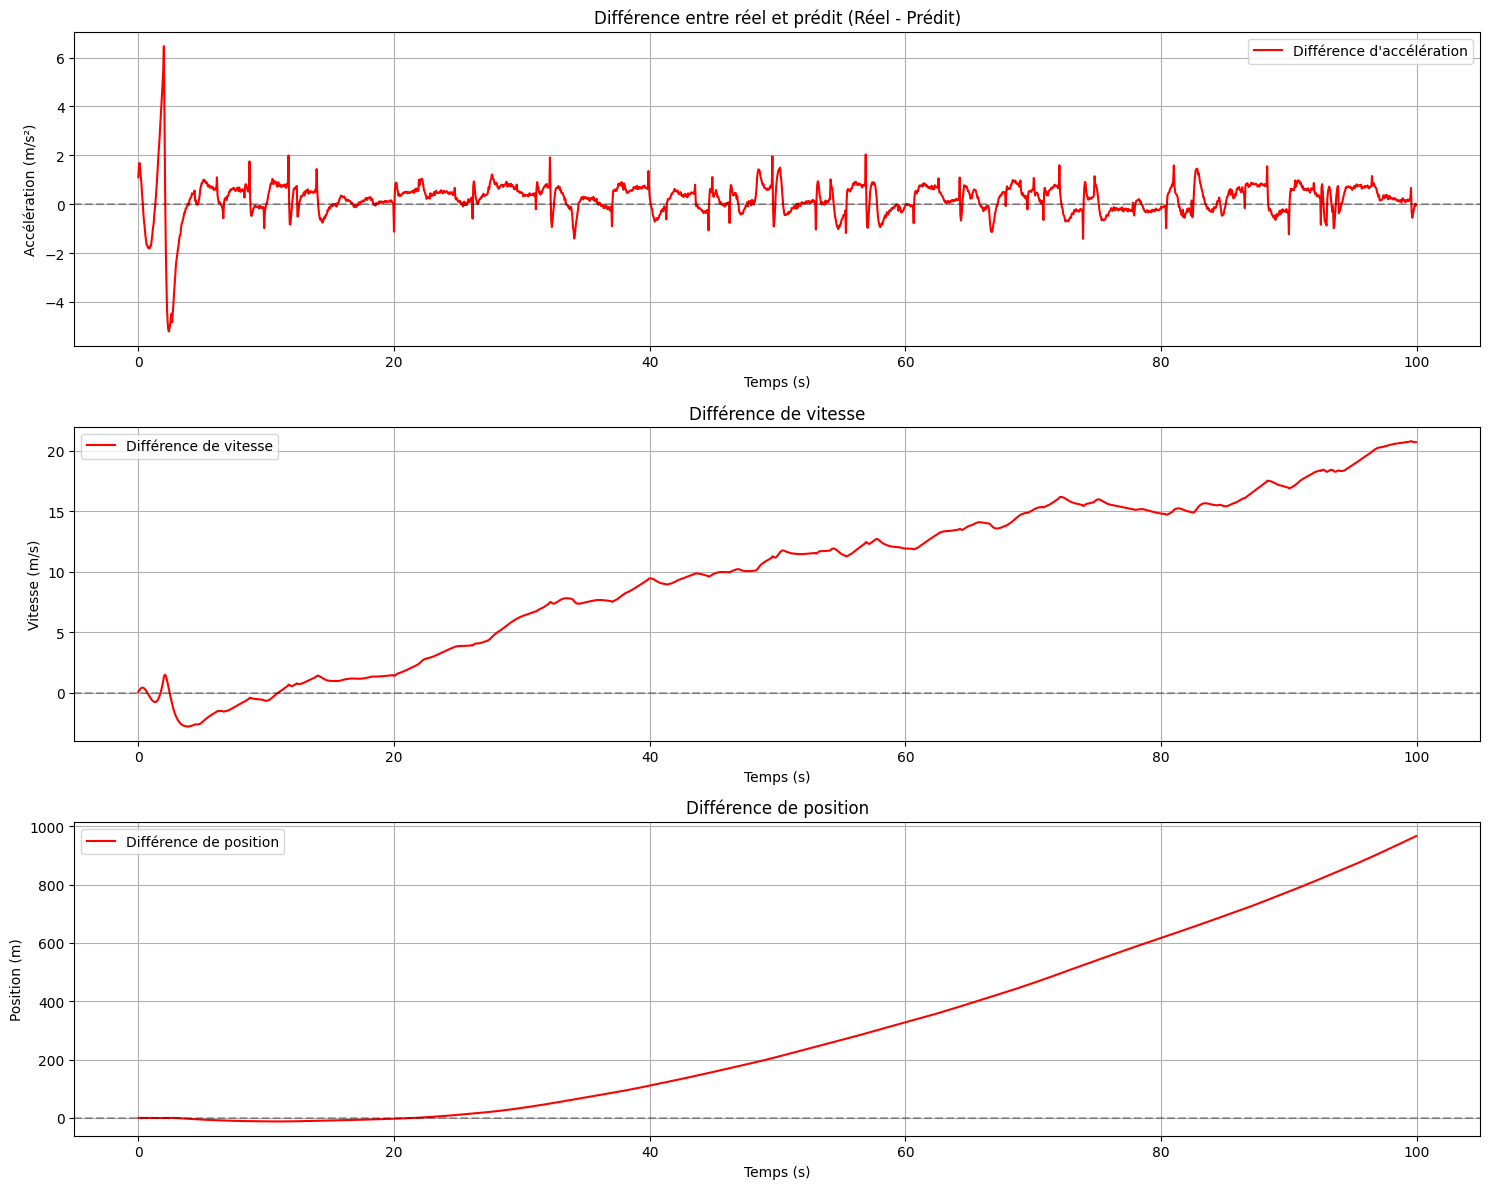

Statistiques des différences (Réel - Prédit) :
Accélération - Moyenne: 0.2069 m/s², Écart-type: 0.7118 m/s²
Vitesse     - Moyenne: 9.6651 m/s, Écart-type: 6.4940 m/s
Position    - Moyenne: 299.0404 m, Écart-type: 300.1431 m


In [13]:
# Calculer les différences
acc_diff = real_acceleration - predicted_acceleration
vel_diff = real_velocity - predicted_velocity
pos_diff = real_position - predicted_position

# time axis
try:
    dt
except NameError:
    dt = 0.05
t = np.arange(len(acc_diff)) * dt

# Affichage des différences
plt.figure(figsize=(15, 12))

# Différence d'accélération
plt.subplot(3, 1, 1)
plt.plot(t, acc_diff, label="Différence d'accélération", color='red')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.title('Différence entre réel et prédit (Réel - Prédit)')
plt.grid(True)
plt.ylabel('Accélération (m/s²)')
plt.xlabel('Temps (s)')

# Différence de vitesse
plt.subplot(3, 1, 2)
plt.plot(t, vel_diff, label='Différence de vitesse', color='red')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.title('Différence de vitesse')
plt.grid(True)
plt.ylabel('Vitesse (m/s)')
plt.xlabel('Temps (s)')

# Différence de position
plt.subplot(3, 1, 3)
plt.plot(t, pos_diff, label='Différence de position', color='red')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.title('Différence de position')
plt.grid(True)
plt.ylabel('Position (m)')
plt.xlabel('Temps (s)')

plt.tight_layout()
plt.show()

# Afficher les statistiques des différences
print("Statistiques des différences (Réel - Prédit) :")
print(f"Accélération - Moyenne: {np.mean(acc_diff):.4f} m/s², Écart-type: {np.std(acc_diff):.4f} m/s²")
print(f"Vitesse     - Moyenne: {np.mean(vel_diff):.4f} m/s, Écart-type: {np.std(vel_diff):.4f} m/s")
print(f"Position    - Moyenne: {np.mean(pos_diff):.4f} m, Écart-type: {np.std(pos_diff):.4f} m")

## LSTM from Josselin

In [9]:
# Chargement du modèle LSTM pré-entraîné avec gestion d'erreurs
from tensorflow.keras.models import load_model
import os

try:
    # Vérifier si le fichier existe
    if not os.path.exists('lstm_acceleration_model.h5'):
        raise FileNotFoundError("Le fichier du modèle n'existe pas")
    
    # Charger le modèle avec custom_objects si nécessaire
    lstm_model = load_model('lstm_acceleration_model.h5', compile=False)
    
    # Vérifier la structure du modèle
    lstm_model.summary()
    
    # Recompiler le modèle avec les mêmes paramètres que lors de l'entraînement
    lstm_model.compile(optimizer='adam', loss='mse')
    
    print("Modèle LSTM chargé avec succès")
    
except Exception as e:
    print(f"Erreur lors du chargement du modèle: {str(e)}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 2000, 8)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000, 1)        │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 329 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

Modèle LSTM chargé avec succès


## GRU

In [13]:
from tensorflow.keras.layers import GRU

# --- Préparation des données (version indépendante) ---
inputs_clean = ddb_in.copy()
outputs_clean = ddb_out.copy()

X_data = inputs_clean.to_numpy()
scaler_inputs = MinMaxScaler()
X_scaled_data = scaler_inputs.fit_transform(X_data)

y_data = outputs_clean.to_numpy()
y_shifted = y_data - y_data[:, 0, np.newaxis]
max_abs_y_global = np.max(np.abs(y_shifted))
y_normalized_data = y_shifted / max_abs_y_global

n_samples_data, n_timesteps_data = X_scaled_data.shape
X_ready = X_scaled_data.reshape(n_samples_data, n_timesteps_data, 1)
y_ready = y_normalized_data.reshape(n_samples_data, n_timesteps_data, 1)

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_ready, y_ready, test_size=0.2, random_state=42
)

# --- Construction du modèle GRU ---
gru_model = Sequential()
gru_model.add(GRU(8, input_shape=(n_timesteps_data, 1), return_sequences=True))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mse')

# --- Entraînement ---
gru_history = gru_model.fit(
    X_train_g, y_train_g,
    validation_data=(X_test_g, y_test_g),
    epochs=20,
    batch_size=32,
    verbose=1
)



Epoch 1/20


/Users/alicepare/Library/Mobile Documents/com~apple~CloudDocs/Documents/Centrale/S7/ST5/EI/Student_folder/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 2.4599e-04 - val_loss: 7.2469e-05
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 2.4599e-04 - val_loss: 7.2469e-05
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 1.4973e-04 - val_loss: 6.1115e-05
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 1.4973e-04 - val_loss: 6.1115e-05
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 1.4227e-04 - val_loss: 5.6676e-05
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 1.4227e-04 - val_loss: 5.6676e-05
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 1.3696e-04 - val_loss: 8.0059e-05
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 1.3696e-04 - val_loss: 8.0059e-05
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 1.3391e-04 - val_loss: 5.5188e-05
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 1.3391e-04 - val_loss: 5.5188e-05
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3023e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3023e-05
Test Loss (GRU): 1.3022564417042304e-05
Test Loss (GRU): 1.3022564417042304e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


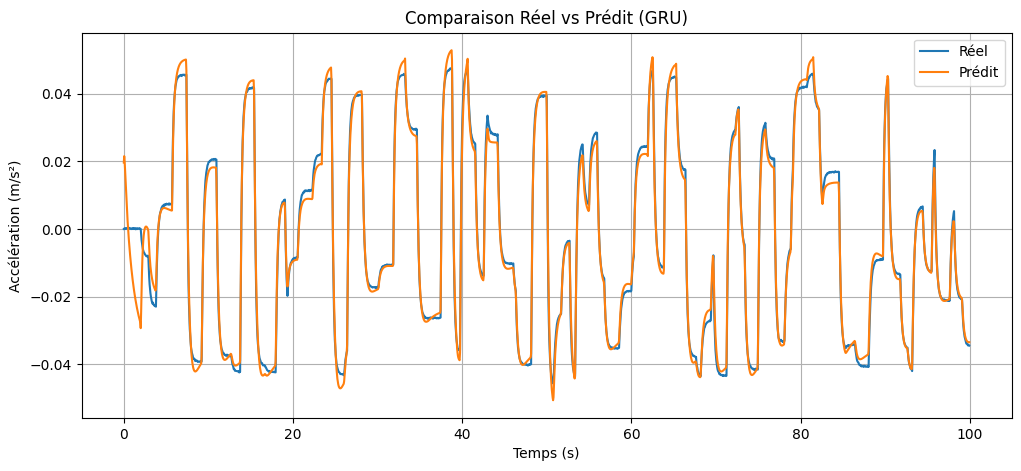

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 2000, 8)        │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000, 1)        │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821 (3.21 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 548 (2.14 KB)

In [14]:
# --- Évaluation ---
gru_loss = gru_model.evaluate(X_test_g, y_test_g)
print(f"Test Loss (GRU): {gru_loss}")

# --- Prédictions ---
y_pred_g = gru_model.predict(X_test_g)

# --- Dénormalisation pour retrouver les valeurs physiques ---
# Récupérer les indices des échantillons de test
indices_data = np.arange(len(X_ready))
_, _, _, _, _, idx_test_g = train_test_split(
    X_ready, y_ready, indices_data, test_size=0.2, random_state=42
)


# Appliquer la même dénormalisation aux données réelles et prédites
initial_values_test = y_data[idx_test_g, 0][:, np.newaxis, np.newaxis]
# y_pred_g_denorm = y_pred_g * max_abs_y_global + initial_values_test
# y_test_g_denorm = y_test_g * max_abs_y_global + initial_values_test

y_pred_g_denorm = y_pred_g 
y_test_g_denorm = y_test_g 


# --- Visualisation pour un exemple ---
example_idx = 100
t = np.arange(len(y_test_g_denorm[example_idx].squeeze())) * dt
plt.figure(figsize=(12, 5))
plt.plot(t, y_test_g_denorm[example_idx].squeeze(), label="Réel")
plt.plot(t, y_pred_g_denorm[example_idx].squeeze(), label="Prédit")
plt.title("Comparaison Réel vs Prédit (GRU)")
plt.xlabel("Temps (s)")
plt.ylabel("Accélération (m/s²)")
plt.legend()
plt.grid(True)
plt.show()

gru_model.summary()

In [31]:
y_pred = gru_model.predict(X_test)
print(y_pred.shape)

# Remettre à l’échelle d’origine
y_pred_real = y_pred * global_max_abs_y
y_test_real = y_test * global_max_abs_y

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_real.flatten(), y_pred_real.flatten()))
print(f"RMSE: {rmse:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(600, 2000, 1)
RMSE: 1.5257


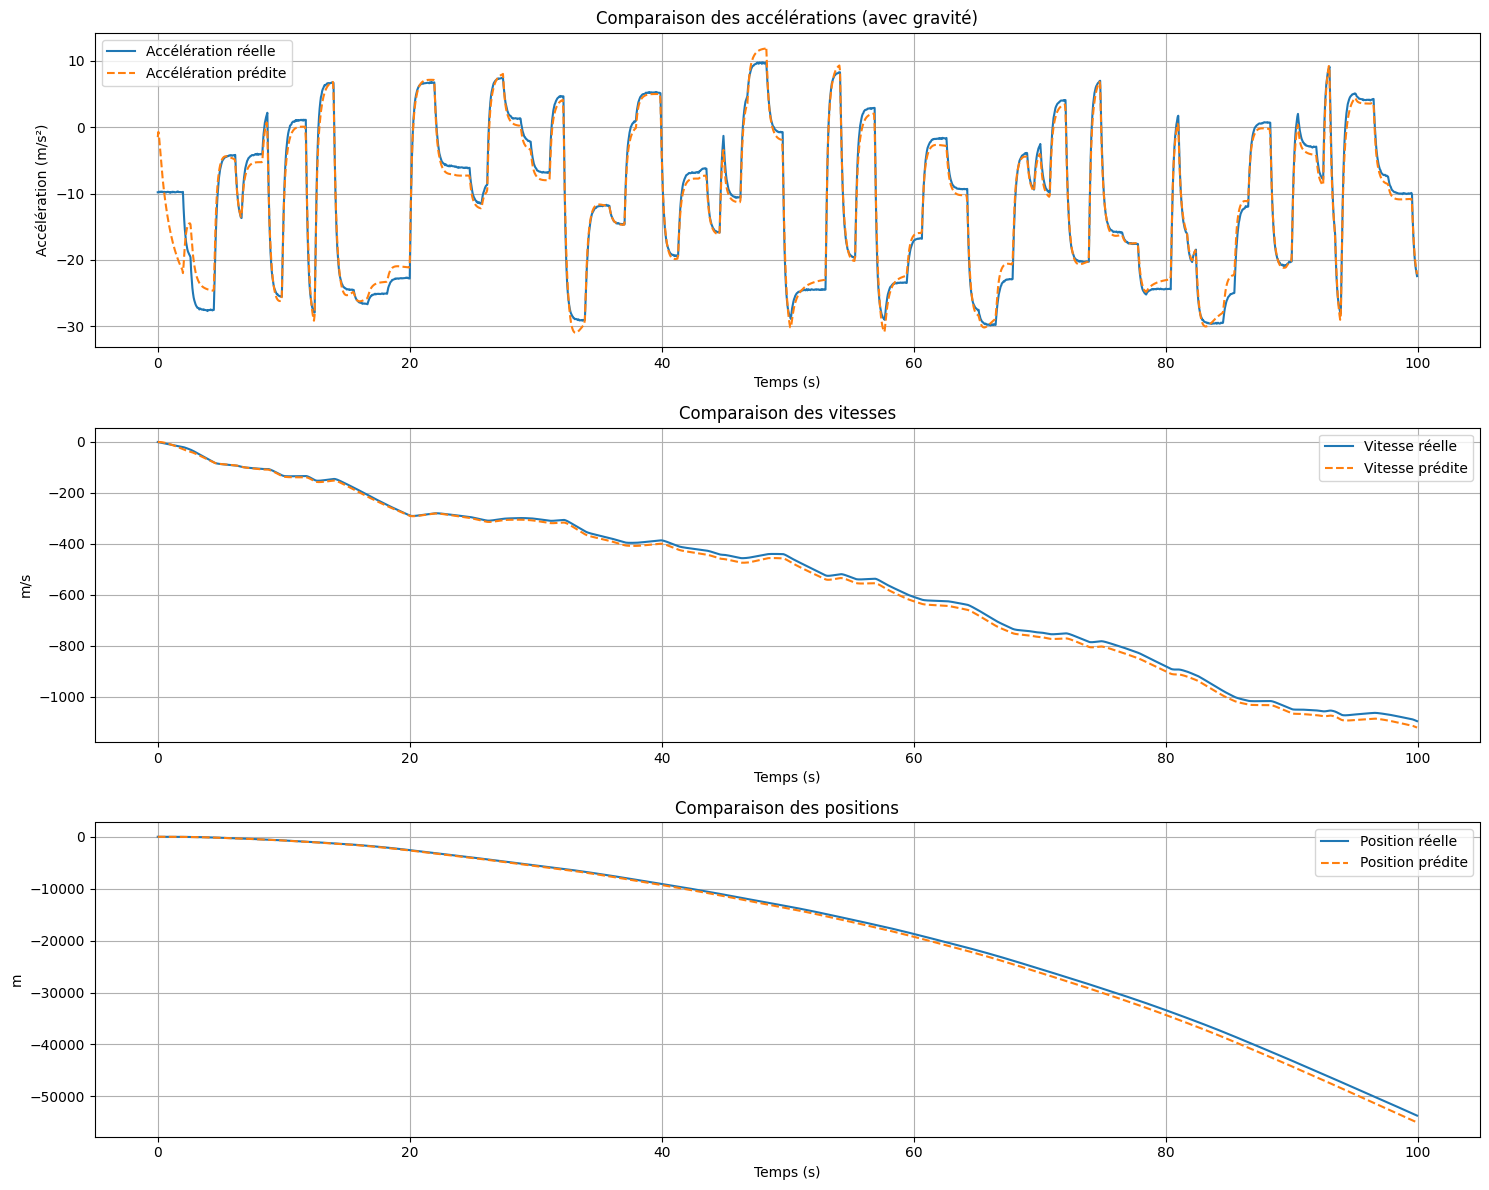

RMSE Accélération: 1.6217 m/s²
RMSE Vitesse: 14.9211 m/s
RMSE Position: 625.8929 m

Valeur initiale de l'accélération : -9.81 m/s²


In [32]:
# Sélectionner un exemple
i = 0   # vous pouvez changer cet indice

# Données réelles et prédites (dénormalisation complète)
real_acceleration = y_test_real[i].squeeze() + y[X_test.shape[0]:][i][0]  # Réajoute la valeur initiale
predicted_acceleration = y_pred_real[i].squeeze() + y[X_test.shape[0]:][i][0]  # Réajoute la même valeur initiale

# Fonction pour calculer la position à partir de l'accélération
def calculate_position(acceleration, dt=0.05):
    velocity = np.cumsum(acceleration) * dt
    position = np.cumsum(velocity) * dt
    return position, velocity

# Calculer les positions et vitesses
real_position, real_velocity = calculate_position(real_acceleration)
predicted_position, predicted_velocity = calculate_position(predicted_acceleration)

# time axis
t = np.arange(len(real_acceleration)) * dt

# Affichage des résultats
plt.figure(figsize=(15, 12))

# Accélération
plt.subplot(3, 1, 1)
plt.plot(t, real_acceleration, label='Accélération réelle')
plt.plot(t, predicted_acceleration, label='Accélération prédite', linestyle='--')
plt.legend()
plt.title('Comparaison des accélérations (avec gravité)')
plt.grid(True)
plt.ylabel('Accélération (m/s²)')
plt.xlabel('Temps (s)')

# Vitesse
plt.subplot(3, 1, 2)
plt.plot(t, real_velocity, label='Vitesse réelle')
plt.plot(t, predicted_velocity, label='Vitesse prédite', linestyle='--')
plt.legend()
plt.title('Comparaison des vitesses')
plt.grid(True)
plt.ylabel('m/s')
plt.xlabel('Temps (s)')

# Position
plt.subplot(3, 1, 3)
plt.plot(t, real_position, label='Position réelle')
plt.plot(t, predicted_position, label='Position prédite', linestyle='--')
plt.legend()
plt.title('Comparaison des positions')
plt.grid(True)
plt.ylabel('m')
plt.xlabel('Temps (s)')

plt.tight_layout()
plt.show()

# Calculer l'erreur RMS pour chaque variable
def calculate_rmse(real, pred):
    return np.sqrt(np.mean((real - pred) ** 2))

print(f"RMSE Accélération: {calculate_rmse(real_acceleration, predicted_acceleration):.4f} m/s²")
print(f"RMSE Vitesse: {calculate_rmse(real_velocity, predicted_velocity):.4f} m/s")
print(f"RMSE Position: {calculate_rmse(real_position, predicted_position):.4f} m")

# Afficher la valeur initiale de l'accélération pour vérification
print(f"\nValeur initiale de l'accélération : {y[X_test.shape[0]:][i][0]:.2f} m/s²")


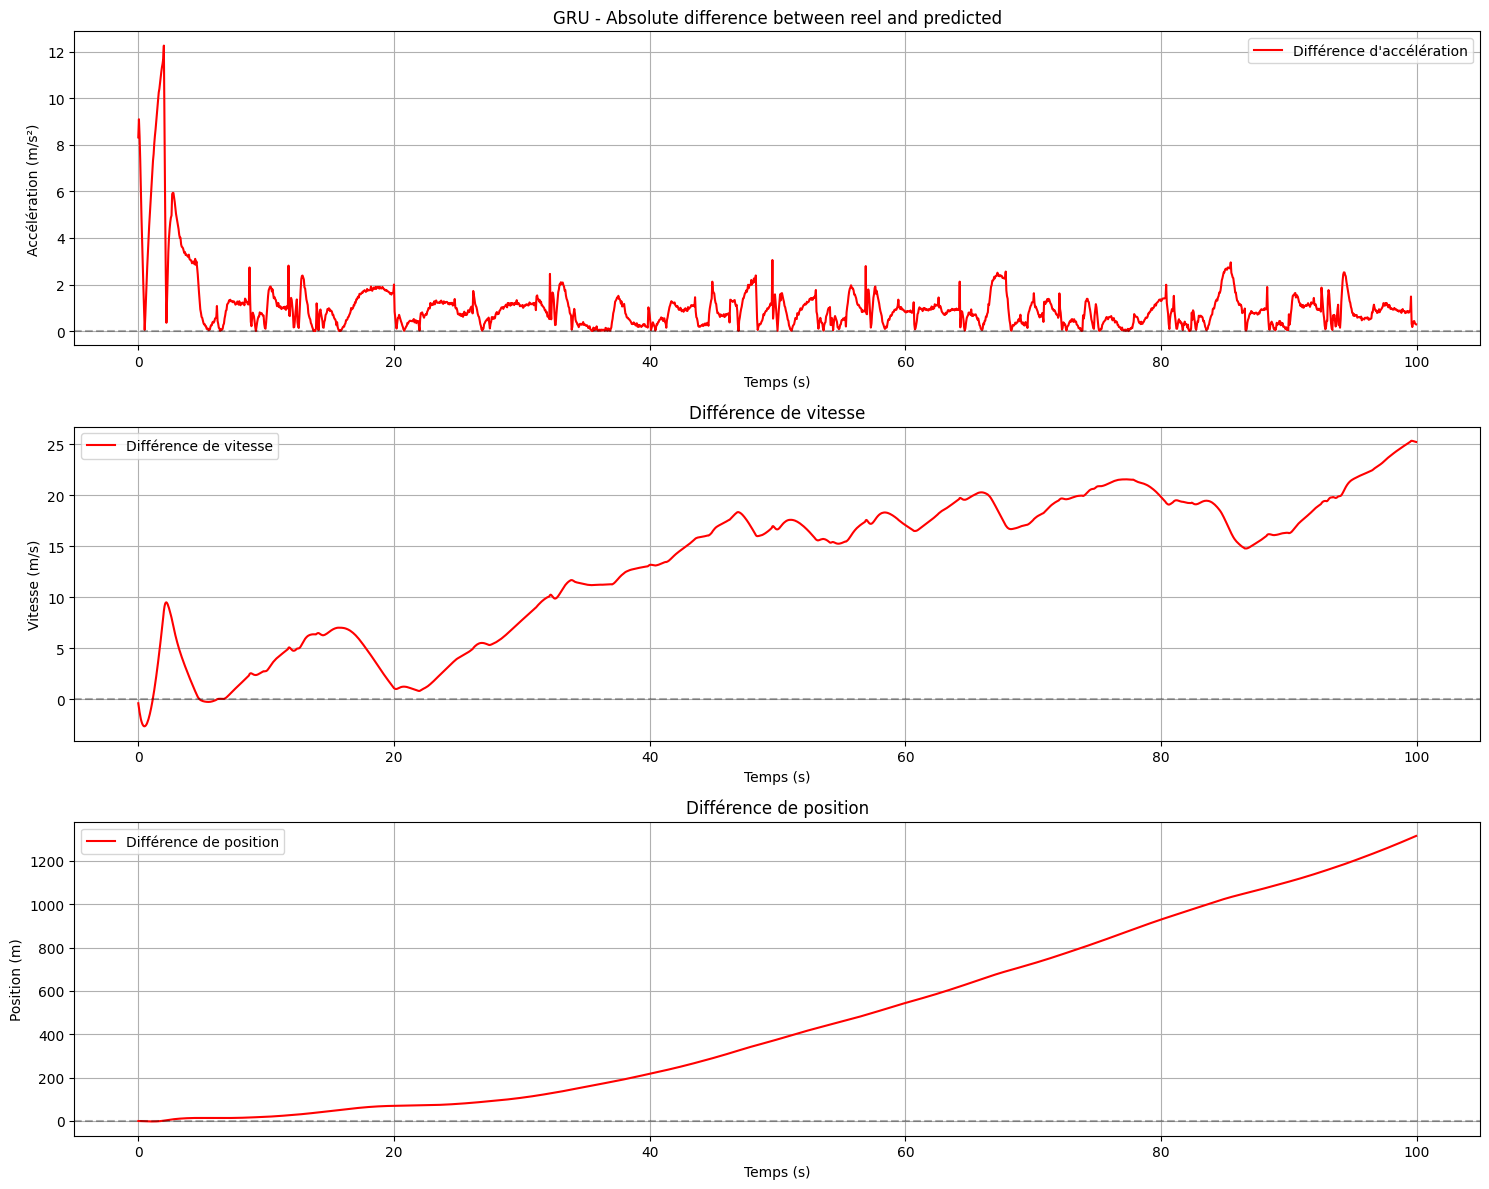

Statistiques des différences (Réel - Prédit) :
Accélération - Moyenne: 1.0559 m/s², Écart-type: 1.2308 m/s²
Vitesse     - Moyenne: 13.1457 m/s, Écart-type: 7.0590 m/s
Position    - Moyenne: 473.0378 m, Écart-type: 409.8502 m


In [33]:
# Calculer les différences
acc_diff = np.abs(real_acceleration - predicted_acceleration)
vel_diff = real_velocity - predicted_velocity
pos_diff = real_position - predicted_position

# time axis
try:
    dt
except NameError:
    dt = 0.05
t = np.arange(len(acc_diff)) * dt

# Affichage des différences
plt.figure(figsize=(15, 12))

# Différence d'accélération
plt.subplot(3, 1, 1)
plt.plot(t, acc_diff, label="Différence d'accélération", color='red')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.title('GRU - Absolute difference between reel and predicted')
plt.grid(True)
plt.ylabel('Accélération (m/s²)')
plt.xlabel('Temps (s)')

# Différence de vitesse
plt.subplot(3, 1, 2)
plt.plot(t, vel_diff, label='Différence de vitesse', color='red')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.title('Différence de vitesse')
plt.grid(True)
plt.ylabel('Vitesse (m/s)')
plt.xlabel('Temps (s)')

# Différence de position
plt.subplot(3, 1, 3)
plt.plot(t, pos_diff, label='Différence de position', color='red')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.title('Différence de position')
plt.grid(True)
plt.ylabel('Position (m)')
plt.xlabel('Temps (s)')

plt.tight_layout()
plt.show()

# Afficher les statistiques des différences
print("Statistiques des différences (Réel - Prédit) :")
print(f"Accélération - Moyenne: {np.mean(acc_diff):.4f} m/s², Écart-type: {np.std(acc_diff):.4f} m/s²")
print(f"Vitesse     - Moyenne: {np.mean(vel_diff):.4f} m/s, Écart-type: {np.std(vel_diff):.4f} m/s")
print(f"Position    - Moyenne: {np.mean(pos_diff):.4f} m, Écart-type: {np.std(pos_diff):.4f} m")

## Controleur MPC

In [ ]:
# === Bloc : Contrôleur MPC basé sur le modèle LSTM ===
import cvxpy as cp
import numpy as np

# Paramètres du MPC
dt = 0.05                # pas de temps (identique à ton dataset)
N = 15                   # horizon de prédiction
Qp = 10.0                # pondération de l’erreur de position
Qv = 1.0                 # pondération de la vitesse
Ru = 0.1                 # pondération de la commande (effort)
u_min, u_max = -2.0, 2.0 # contraintes sur la commande (accélération)

# Objectif : suivre une trajectoire de position cible
target_position = 10.0    # position de consigne (exemple : 10 m)

# === Fonction de simulation utilisant le LSTM entraîné ===
def simulate_system(x, u, model, scaler_X, global_max_abs_y):
    """
    Simule un pas de temps en utilisant le modèle LSTM entraîné.

    Stratégie/assumptions :
    - Le LSTM a été entraîné avec des entrées X de forme (n_samples, n_timesteps)
      (puis reshaped en (n_samples, n_timesteps, 1)). Donc le scaler_X attend
      n_timesteps features (chaque colonne = timestep dans la représentation utilisée).
    - On construit une fenêtre glissante d'entrée de longueur `n_timesteps` composée
      des dernières commandes/valeurs d'entrée. Cette fenêtre est maintenue dans
      un buffer global `_lstm_input_buffer` initialisé à zéro la première fois.
    - On normalise la fenêtre avec `scaler_X.transform`, on reshape en (1, n_timesteps, 1)
      et on appelle `model.predict`. On utilise la dernière valeur de la prédiction
      (y_pred[0, -1, 0]) comme accélération estimée (puis remise à l'échelle).

    Si une erreur survient (absence de scaler/model ou mismatch), on retombe
    sur une intégration physique simple (acc = u).
    """
    global _lstm_input_buffer, n_timesteps

    # Fallback if necessary
    if model is None or scaler_X is None or global_max_abs_y is None:
        acc = float(u)
        new_v = x[1] + acc * dt
        new_p = x[0] + new_v * dt
        return np.array([new_p, new_v])

    # Initialize buffer on first call
    try:
        _ = _lstm_input_buffer
    except NameError:
        # initialiser à zéro ; dimension = n_timesteps (défini lors de preprocessing)
        try:
            _lstm_input_buffer = np.zeros(n_timesteps)
        except NameError:
            # si n_timesteps non défini, fallback
            acc = float(u)
            new_v = x[1] + acc * dt
            new_p = x[0] + new_v * dt
            return np.array([new_p, new_v])

    # Shift buffer left and append newest input value (ici on suppose que u est la variable d'entrée)
    _lstm_input_buffer = np.roll(_lstm_input_buffer, -1)
    _lstm_input_buffer[-1] = float(u)

    # Préparer pour le scaler (scaler_X was fitted on shape (n_samples, n_timesteps))
    try:
        X_scaled = scaler_X.transform(_lstm_input_buffer.reshape(1, -1))
    except Exception as e:
        # Si transform échoue, retomber sur l'intégration simple
        print(f"Warning: scaler_X.transform failed: {e}. Using physics fallback.")
        acc = float(u)
        new_v = x[1] + acc * dt
        new_p = x[0] + new_v * dt
        return np.array([new_p, new_v])

    X_reshaped = X_scaled.reshape(1, X_scaled.shape[1], 1)

    try:
        y_pred = model.predict(X_reshaped, verbose=0)
        # Utilise la dernière prédiction temporelle comme accélération (remise à l'échelle)
        acc = float(y_pred[0, -1, 0]) * global_max_abs_y
    except Exception as e:
        print(f"Warning: model.predict failed: {e}. Using physics fallback.")
        acc = float(u)

    # Intégration simple pour obtenir le nouvel état
    new_v = x[1] + acc * dt
    new_p = x[0] + new_v * dt
    return np.array([new_p, new_v])


# === MPC utilisant random-shooting + LSTM pour prédictions ===
def mpc_control_step_lstm(x0, model, scaler_X, global_max_abs_y, buffer=None, horizon=N, num_candidates=200):
    """
    Retourne la première commande u_0 trouvée par random-shooting qui minimise
    une fonction de coût basée sur les prédictions du LSTM intégrées sur l'horizon.

    - x0 : état courant [pos, vel]
    - model, scaler_X, global_max_abs_y : éléments du LSTM
    - buffer : tableau 1D de longueur n_timesteps contenant l'historique des entrées
               (si None, on essaie d'initialiser à partir de X_scaled ou à zéro)
    - horizon : nombre de pas de prédiction (N)
    - num_candidates : nombre de séquences candidates à échantillonner

    Limitation : méthode sans gradient (random shooting). Peut être lente si num_candidates
    grand et horizon important. On peut réduire num_candidates ou l'horizon pour accélérer.
    """
    # Try to get n_timesteps if available
    try:
        nt = n_timesteps
    except NameError:
        try:
            nt = X_scaled.shape[1]
        except Exception:
            raise RuntimeError("n_timesteps non défini ; exécutez la cellule de preprocessing avant.")

    # Initialize buffer
    if buffer is None:
        # Try last sample from X_scaled if exists
        try:
            buf = X_scaled[-1].copy()
        except Exception:
            buf = np.zeros(nt)
    else:
        buf = np.array(buffer).copy()
        if buf.size != nt:
            # try to reshape or fallback
            buf = np.resize(buf, nt)

    # Sample candidate sequences uniformly within bounds
    candidates = np.random.uniform(u_min, u_max, size=(num_candidates, horizon))

    best_cost = np.inf
    best_seq = None

    # Evaluate each candidate sequence
    for j in range(num_candidates):
        pos = float(x0[0])
        vel = float(x0[1])
        local_buf = buf.copy()
        total_cost = 0.0

        for k in range(horizon):
            uk = float(candidates[j, k])
            # update buffer with uk
            local_buf = np.roll(local_buf, -1)
            local_buf[-1] = uk

            # scale and predict
            try:
                Xs = scaler_X.transform(local_buf.reshape(1, -1))
                Xin = Xs.reshape(1, Xs.shape[1], 1)
                ypred = model.predict(Xin, verbose=0)
                acc = float(ypred[0, -1, 0]) * global_max_abs_y
            except Exception:
                # fallback: use uk as proxy for acceleration if predict fails
                acc = uk

            # integrate
            vel = vel + acc * dt
            pos = pos + vel * dt

            # incremental cost
            total_cost += Qp * (pos - target_position) ** 2 + Qv * (vel ** 2) + Ru * (uk ** 2)

            # Early stop if cost already worse than best
            if total_cost >= best_cost:
                break

        if total_cost < best_cost:
            best_cost = total_cost
            best_seq = candidates[j].copy()

    if best_seq is None:
        # fallback: zero command
        return 0.0

    return float(best_seq[0])


# Keep legacy linear MPC function (optional) as reference
def mpc_control_step_linear(x0):
    nx, nu = 2, 1
    x = cp.Variable((nx, N+1))
    u = cp.Variable((nu, N))
    x_init = cp.Parameter(nx)
    x_init.value = x0

    cost = 0
    constraints = [x[:, 0] == x_init]
    for k in range(N):
        A = np.array([[1, dt],
                      [0, 1]])
        B = np.array([[0.5*dt**2],
                      [dt]])

        constraints += [x[:, k+1] == A @ x[:, k] + B.flatten() * u[:, k]]
        constraints += [u_min <= u[:, k], u[:, k] <= u_max]

        cost += Qp * cp.square(x[0, k] - target_position) + Qv * cp.square(x[1, k]) + Ru * cp.square(u[:, k])

    prob = cp.Problem(cp.Minimize(cost), constraints)
    prob.solve(solver=cp.OSQP, warm_start=True, verbose=False)

    if prob.status not in ["optimal", "optimal_inaccurate"]:
        print("MPC non résolu :", prob.status)
        return 0.0

    return u.value[0, 0]


In [ ]:
# === Simulation MPC en boucle fermée (version corrigée) ===

import tqdm  # pour barre de progression
import numpy as np

n_steps = 200
horizon = 15
num_candidates = 30  # réduit pour accélérer

# Pré-allocation des tableaux pour éviter les allocations dynamiques
x = np.array([0.0, 0.0])  # état initial : position, vitesse
trajectory = np.zeros((n_steps + 1, 2))  # [position, vitesse]
trajectory[0] = x
commands = np.zeros(n_steps)
buffer = np.zeros(n_timesteps)

# Paramètres de contrôle ajustés
Qp = 100.0  # Augmenté pour donner plus d'importance à l'erreur de position
Qv = 10.0   # Augmenté pour mieux contrôler la vitesse
Ru = 1.0    # Diminué pour permettre des commandes plus agressives

# Boucle de simulation avec optimisation
for t in tqdm.tqdm(range(n_steps), desc="Simulation MPC"):
    # Générer des candidats de manière plus intelligente
    if t == 0:
        # Pour le premier pas, explorer largement
        candidates = np.random.uniform(-2.0, 2.0, size=num_candidates)
    else:
        # Ensuite, chercher autour de la dernière commande qui a marché
        base_command = commands[t-1]
        variations = np.linspace(-1.0, 1.0, num_candidates)
        candidates = base_command + variations
        candidates = np.clip(candidates, -2.0, 2.0)
    
    best_cost = float('inf')
    best_u = 0.0
    
    # Simulation et évaluation pour chaque candidat
    for i in range(num_candidates):
        u = candidates[i]
        pos = x[0]
        vel = x[1]
        local_buf = buffer.copy()
        cost = 0.0
        
        # Simulation sur l'horizon de prédiction
        for k in range(horizon):
            # Mettre à jour le buffer
            local_buf = np.roll(local_buf, -1)
            local_buf[-1] = u if k == 0 else 0.0  # Appliquer u seulement au premier pas
            
            # Prédire l'accélération avec le GRU
            X_scaled = scaler_X.transform(local_buf.reshape(1, -1))
            X_reshaped = X_scaled.reshape(1, X_scaled.shape[1], 1)
            pred = gru_model.predict(X_reshaped, verbose=0)
            acc = float(pred[0, -1, 0]) * global_max_abs_y
            
            # Intégrer la dynamique
            vel = vel + acc * dt
            pos = pos + vel * dt
            
            # Calculer le coût
            cost += (Qp * (pos - target_position)**2 +  # erreur de position
                    Qv * vel**2 +                       # pénaliser les vitesses élevées
                    Ru * u**2)                          # pénaliser les commandes fortes
            
            # Early stopping si le coût est déjà trop élevé
            if cost > best_cost:
                break
        
        # Mettre à jour la meilleure commande
        if cost < best_cost:
            best_cost = cost
            best_u = u
    
    # Appliquer la meilleure commande
    u_opt = best_u
    commands[t] = u_opt
    
    # Mettre à jour le buffer
    buffer = np.roll(buffer, -1)
    buffer[-1] = u_opt
    
    # Simuler le système avec le GRU
    x = simulate_system(x, u_opt, lstm_model, scaler_X, global_max_abs_y)
    trajectory[t + 1] = x
    
    # Affichage périodique
    if t % 20 == 0:
        print(f"Step {t}: pos={x[0]:.3f}, vel={x[1]:.3f}, u={u_opt:.3f}, cost={best_cost:.3f}")


Simulation MPC:   0%|          | 1/200 [00:19<1:05:25, 19.72s/it]

Step 0: pos=-0.891, vel=-17.828, u=1.761, cost=139885.130


Simulation MPC:   4%|▎         | 7/200 [02:31<1:09:24, 21.58s/it]



KeyboardInterrupt: 

In [ ]:
# Convertir l'abscisse en temps (secondes)
t_traj = np.arange(len(trajectory)) * dt
t_cmd = np.arange(len(commands)) * dt

# Visualisation des résultats
plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
plt.plot(t_traj, trajectory[:,0], label="Position (m)")
plt.axhline(target_position, color='r', linestyle='--', label='Consigne')
plt.legend()
plt.grid()
plt.title("Position sous contrôle MPC (GRU)")
plt.xlabel('Temps (s)')
plt.ylabel('Position (m)')

plt.subplot(3,1,2)
plt.plot(t_traj, trajectory[:,1], label="Vitesse (m/s)")
plt.legend()
plt.grid()
plt.xlabel('Temps (s)')
plt.ylabel('Vitesse (m/s)')

plt.subplot(3,1,3)
plt.plot(t_cmd, commands, label="Commande (accélération)")
plt.legend()
plt.grid()
plt.xlabel("Temps (s)")
plt.ylabel('Accélération (m/s²)')

plt.tight_layout()
plt.show()

# Analyse des performances
print("\nAnalyse des performances MPC:")
print(f"Position finale : {trajectory[-1,0]:.2f} m")
print(f"Erreur finale : {abs(target_position - trajectory[-1,0]):.2f} m")
print(f"Vitesse finale : {trajectory[-1,1]:.2f} m/s")
print(f"Commande max : {np.max(np.abs(commands)):.2f} m/s²")
print(f"Dépassement max : {np.max(trajectory[:,0]) - target_position:.2f} m")

## Controleur PID 


In [ ]:
# === Implémentation du contrôle PID avec LSTM ===

class PIDController:
    def __init__(self, Kp=2.0, Ki=0.1, Kd=1.0, dt=0.05):
        self.Kp = Kp          # Gain proportionnel
        self.Ki = Ki          # Gain intégral
        self.Kd = Kd          # Gain dérivé
        self.dt = dt          # Pas de temps
        self.reset()

    def reset(self):
        self.integral = 0     # Accumulation de l'erreur (terme I)
        self.prev_error = 0   # Erreur précédente (pour terme D)

    def compute(self, setpoint, current_position, current_velocity=None):
        # Calcul de l'erreur
        error = setpoint - current_position
        
        # Terme intégral (accumulation)
        self.integral += error * self.dt
        
        # Terme dérivé (utilise la vitesse mesurée si disponible)
        if current_velocity is not None:
            derivative = -current_velocity
        else:
            derivative = (error - self.prev_error) / self.dt
        
        # Calcul de la commande PID
        u = (self.Kp * error +
             self.Ki * self.integral +
             self.Kd * derivative)
        
        self.prev_error = error
        return u

def predict_next_state(x, u, model, scaler, buffer, max_abs_y):
    """
    Prédit le prochain état en utilisant le modèle model.
    x: [position, vitesse]
    u: commande
    Retourne: [nouvelle_position, nouvelle_vitesse]
    """
    dt = 0.05  # même pas de temps que les données
    
    # Met à jour le buffer circulaire avec la nouvelle commande
    buffer = np.roll(buffer, -1)
    buffer[-1] = u
    
    # Normalise et reshape pour le LSTM
    try:
        X_scaled = scaler.transform(buffer.reshape(1, -1))
        X_reshaped = X_scaled.reshape(1, X_scaled.shape[1], 1)
        
        # Prédit l'accélération
        y_pred = model.predict(X_reshaped, verbose=0)
        acc = float(y_pred[0, -1, 0]) * max_abs_y
        
        # Intègre pour position et vitesse
        new_v = x[1] + acc * dt
        new_p = x[0] + new_v * dt
        return np.array([new_p, new_v])
    
    except Exception as e:
        print(f"Erreur prédiction: {e}")
        # Fallback: intégration simple
        new_v = x[1] + u * dt
        new_p = x[0] + new_v * dt
        return np.array([new_p, new_v])



In [ ]:
# Configuration de la simulation
target_height = 10.0     # hauteur cible (m)
n_steps = 1000          # durée simulation
dt = 0.05              # pas de temps
u_bounds = (-2.0, 2.0) # limites commande

# Initialisation
pid = PIDController(Kp=2.0, Ki=0.1, Kd=1.0, dt=dt)
x = np.array([0.0, 0.0])  # état initial [pos, vel]
buffer = np.zeros(n_timesteps)  # buffer pour LSTM
trajectory = [x.copy()]
commands = []

# Boucle de simulation avec barre de progression
for t in tqdm.tqdm(range(n_steps), desc="Simulation PID"):
    # Calcul commande PID
    u = pid.compute(target_height, x[0], x[1])
    u = np.clip(u, u_bounds[0], u_bounds[1])
    commands.append(u)
    
    # Simulation avec GRU
    x = predict_next_state(x, u, model, scaler_X, buffer.copy(), global_max_abs_y)
    trajectory.append(x.copy())
    
    # Affichage périodique de l'état
    if t % 20 == 0:
        print(f"Step {t}: pos={x[0]:.3f}, vel={x[1]:.3f}, u={u:.3f}")

trajectory = np.array(trajectory)
commands = np.array(commands)

Simulation PID:   0%|          | 5/1000 [00:00<00:51, 19.29it/s]

Step 0: pos=0.002, vel=0.040, u=2.000


Simulation PID:   2%|▏         | 23/1000 [00:01<00:47, 20.64it/s]

Step 20: pos=0.466, vel=0.847, u=2.000


Simulation PID:   4%|▍         | 44/1000 [00:02<00:44, 21.49it/s]

Step 40: pos=1.737, vel=1.654, u=2.000


Simulation PID:   6%|▋         | 65/1000 [00:03<00:43, 21.73it/s]

Step 60: pos=3.814, vel=2.461, u=2.000


Simulation PID:   8%|▊         | 83/1000 [00:03<00:41, 22.08it/s]

Step 80: pos=6.698, vel=3.267, u=2.000


Simulation PID:  10%|█         | 104/1000 [00:04<00:40, 22.18it/s]

Step 100: pos=10.292, vel=3.532, u=-0.497


Simulation PID:  12%|█▎        | 125/1000 [00:05<00:39, 21.99it/s]

Step 120: pos=13.725, vel=3.459, u=-2.000


Simulation PID:  14%|█▍        | 143/1000 [00:06<00:38, 22.11it/s]

Step 140: pos=17.221, vel=3.530, u=-2.000


Simulation PID:  16%|█▋        | 164/1000 [00:07<00:37, 22.07it/s]

Step 160: pos=20.789, vel=3.601, u=-2.000


Simulation PID:  18%|█▊        | 185/1000 [00:08<00:37, 21.97it/s]

Step 180: pos=24.427, vel=3.672, u=-2.000


Simulation PID:  20%|██        | 203/1000 [00:09<00:35, 22.35it/s]

Step 200: pos=28.136, vel=3.743, u=-2.000


Simulation PID:  22%|██▏       | 224/1000 [00:10<00:35, 21.74it/s]

Step 220: pos=31.917, vel=3.814, u=-2.000


Simulation PID:  24%|██▍       | 245/1000 [00:11<00:34, 22.01it/s]

Step 240: pos=35.768, vel=3.885, u=-2.000


Simulation PID:  26%|██▋       | 263/1000 [00:12<00:33, 22.08it/s]

Step 260: pos=39.691, vel=3.956, u=-2.000


Simulation PID:  28%|██▊       | 284/1000 [00:13<00:32, 22.22it/s]

Step 280: pos=43.685, vel=4.028, u=-2.000


Simulation PID:  30%|███       | 305/1000 [00:14<00:31, 22.19it/s]

Step 300: pos=47.750, vel=4.099, u=-2.000


Simulation PID:  32%|███▏      | 323/1000 [00:14<00:30, 22.28it/s]

Step 320: pos=51.886, vel=4.170, u=-2.000


Simulation PID:  34%|███▍      | 344/1000 [00:15<00:29, 22.39it/s]

Step 340: pos=56.093, vel=4.241, u=-2.000


Simulation PID:  36%|███▋      | 365/1000 [00:16<00:28, 22.21it/s]

Step 360: pos=60.371, vel=4.312, u=-2.000


Simulation PID:  38%|███▊      | 383/1000 [00:17<00:27, 22.42it/s]

Step 380: pos=64.720, vel=4.383, u=-2.000


Simulation PID:  40%|████      | 404/1000 [00:18<00:26, 22.25it/s]

Step 400: pos=69.141, vel=4.454, u=-2.000


Simulation PID:  42%|████▎     | 425/1000 [00:19<00:25, 22.39it/s]

Step 420: pos=73.632, vel=4.525, u=-2.000


Simulation PID:  44%|████▍     | 443/1000 [00:20<00:24, 22.36it/s]

Step 440: pos=78.195, vel=4.596, u=-2.000


Simulation PID:  46%|████▋     | 464/1000 [00:21<00:23, 22.44it/s]

Step 460: pos=82.829, vel=4.667, u=-2.000


Simulation PID:  48%|████▊     | 485/1000 [00:22<00:23, 21.58it/s]

Step 480: pos=87.533, vel=4.739, u=-2.000


Simulation PID:  50%|█████     | 503/1000 [00:22<00:22, 22.46it/s]

Step 500: pos=92.309, vel=4.810, u=-2.000


Simulation PID:  52%|█████▏    | 524/1000 [00:23<00:21, 22.37it/s]

Step 520: pos=97.156, vel=4.881, u=-2.000


Simulation PID:  55%|█████▍    | 545/1000 [00:24<00:20, 22.34it/s]

Step 540: pos=102.074, vel=4.952, u=-2.000


Simulation PID:  56%|█████▋    | 563/1000 [00:25<00:19, 22.42it/s]

Step 560: pos=107.063, vel=5.023, u=-2.000


Simulation PID:  58%|█████▊    | 584/1000 [00:26<00:18, 22.36it/s]

Step 580: pos=112.124, vel=5.094, u=-2.000


Simulation PID:  60%|██████    | 605/1000 [00:27<00:17, 22.05it/s]

Step 600: pos=117.255, vel=5.165, u=-2.000


Simulation PID:  62%|██████▏   | 623/1000 [00:28<00:17, 22.16it/s]

Step 620: pos=122.457, vel=5.236, u=-2.000


Simulation PID:  64%|██████▍   | 644/1000 [00:29<00:15, 22.30it/s]

Step 640: pos=127.731, vel=5.307, u=-2.000


Simulation PID:  66%|██████▋   | 665/1000 [00:30<00:15, 21.39it/s]

Step 660: pos=133.076, vel=5.378, u=-2.000


Simulation PID:  68%|██████▊   | 683/1000 [00:31<00:15, 21.09it/s]

Step 680: pos=138.491, vel=5.450, u=-2.000


Simulation PID:  70%|███████   | 704/1000 [00:32<00:13, 22.13it/s]

Step 700: pos=143.978, vel=5.521, u=-2.000


Simulation PID:  72%|███████▎  | 725/1000 [00:33<00:12, 22.29it/s]

Step 720: pos=149.536, vel=5.592, u=-2.000


Simulation PID:  74%|███████▍  | 743/1000 [00:33<00:11, 22.19it/s]

Step 740: pos=155.165, vel=5.663, u=-2.000


Simulation PID:  76%|███████▋  | 764/1000 [00:34<00:10, 21.62it/s]

Step 760: pos=160.865, vel=5.734, u=-2.000


Simulation PID:  78%|███████▊  | 785/1000 [00:35<00:10, 21.43it/s]

Step 780: pos=166.637, vel=5.805, u=-2.000


Simulation PID:  80%|████████  | 803/1000 [00:36<00:09, 20.37it/s]

Step 800: pos=172.479, vel=5.876, u=-2.000


Simulation PID:  82%|████████▏ | 824/1000 [00:37<00:08, 20.98it/s]

Step 820: pos=178.392, vel=5.947, u=-2.000


Simulation PID:  84%|████████▍ | 845/1000 [00:38<00:07, 22.12it/s]

Step 840: pos=184.377, vel=6.018, u=-2.000


Simulation PID:  86%|████████▋ | 863/1000 [00:39<00:06, 20.39it/s]

Step 860: pos=190.433, vel=6.089, u=-2.000


Simulation PID:  88%|████████▊ | 884/1000 [00:40<00:05, 22.16it/s]

Step 880: pos=196.559, vel=6.161, u=-2.000


Simulation PID:  90%|█████████ | 905/1000 [00:41<00:04, 22.52it/s]

Step 900: pos=202.757, vel=6.232, u=-2.000


Simulation PID:  92%|█████████▏| 923/1000 [00:42<00:03, 22.57it/s]

Step 920: pos=209.026, vel=6.303, u=-2.000


Simulation PID:  94%|█████████▍| 944/1000 [00:43<00:02, 22.29it/s]

Step 940: pos=215.366, vel=6.374, u=-2.000


Simulation PID:  96%|█████████▋| 965/1000 [00:44<00:01, 22.38it/s]

Step 960: pos=221.777, vel=6.445, u=-2.000


Simulation PID:  98%|█████████▊| 983/1000 [00:44<00:00, 22.52it/s]

Step 980: pos=228.259, vel=6.516, u=-2.000


Simulation PID: 100%|██████████| 1000/1000 [00:45<00:00, 21.86it/s]


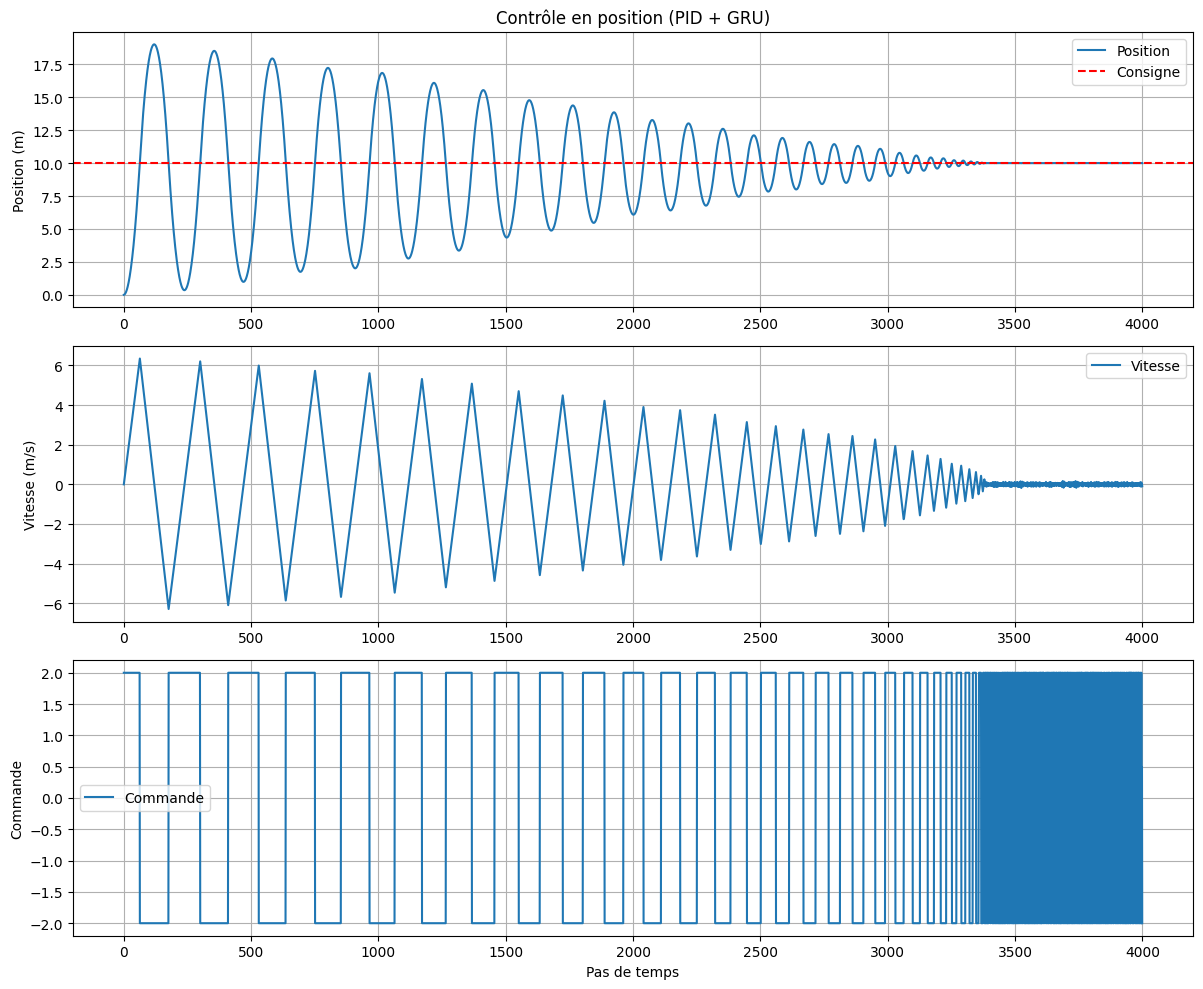


Analyse des performances :
Position finale : 10.00 m
Erreur finale : 0.00 m
Vitesse finale : -0.09 m/s
Commande max : 2.00
Dépassement max : 9.01 m


In [122]:
# Visualisation
plt.figure(figsize=(12, 10))

# Position
plt.subplot(3,1,1)
plt.plot(trajectory[:,0], label="Position")
plt.axhline(target_height, color='r', linestyle='--', label='Consigne')
plt.grid(True)
plt.legend()
plt.title("Contrôle en position (PID + GRU)")
plt.ylabel("Position (m)")

# Vitesse
plt.subplot(3,1,2)
plt.plot(trajectory[:,1], label="Vitesse")
plt.grid(True)
plt.legend()
plt.ylabel("Vitesse (m/s)")

# Commande
plt.subplot(3,1,3)
plt.plot(commands, label="Commande")
plt.grid(True)
plt.legend()
plt.xlabel("Pas de temps")
plt.ylabel("Commande")

plt.tight_layout()
plt.show()

# Analyse des performances
print("\nAnalyse des performances :")
print(f"Position finale : {trajectory[-1,0]:.2f} m")
print(f"Erreur finale : {abs(target_height - trajectory[-1,0]):.2f} m")
print(f"Vitesse finale : {trajectory[-1,1]:.2f} m/s")
print(f"Commande max : {np.max(np.abs(commands)):.2f}")
print(f"Dépassement max : {np.max(trajectory[:,0]) - target_height:.2f} m")

## Commande LQ

In [100]:
import numpy as np
from scipy import linalg

class LQController:
    def __init__(self, Q, R, dt=0.05):
        self.Q = Q
        self.R = R
        self.dt = dt
        
    def get_control(self, current_state, target_state):
        state_error = current_state - target_state
        A = np.array([[1, self.dt],
                     [0, 1]])
        B = np.array([[0.5 * self.dt**2],
                     [self.dt]])
        P = linalg.solve_continuous_are(A, B, self.Q, self.R)
        K = -np.linalg.inv(self.R).dot(B.T.dot(P))
        u = K.dot(state_error)
        return float(u)


In [120]:
# Configuration
target_height = 10.0
n_steps = 4000
dt = 0.05
u_bounds = (-2.0, 2.0)
Q = np.diag([2000, 10.0])
R = np.array([[10]])

# Initialisation
lqr = LQController(Q, R, dt)
x = np.array([0.0, 0.0])
target_state = np.array([target_height, 0.0])
buffer = np.zeros(n_timesteps)
trajectory = [x.copy()]
commands = []

# Simulation
for i in range(n_steps):
    u = lqr.get_control(x, target_state)
    u = np.clip(u, u_bounds[0], u_bounds[1])
    commands.append(u)
    x = predict_next_state(x, u, model, scaler_X, buffer.copy(), global_max_abs_y)
    trajectory.append(x.copy())

trajectory = np.array(trajectory)
commands = np.array(commands)

/var/folders/7b/wkyjny794md78_2yrm801zxm0000gn/T/ipykernel_22596/4233226070.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(u)
/var/folders/7b/wkyjny794md78_2yrm801zxm0000gn/T/ipykernel_22596/4233226070.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(u)
/var/folders/7b/wkyjny794md78_2yrm801zxm0000gn/T/ipykernel_22596/4233226070.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(u)
/var/folders/7b/wkyjny794md78_2yrm

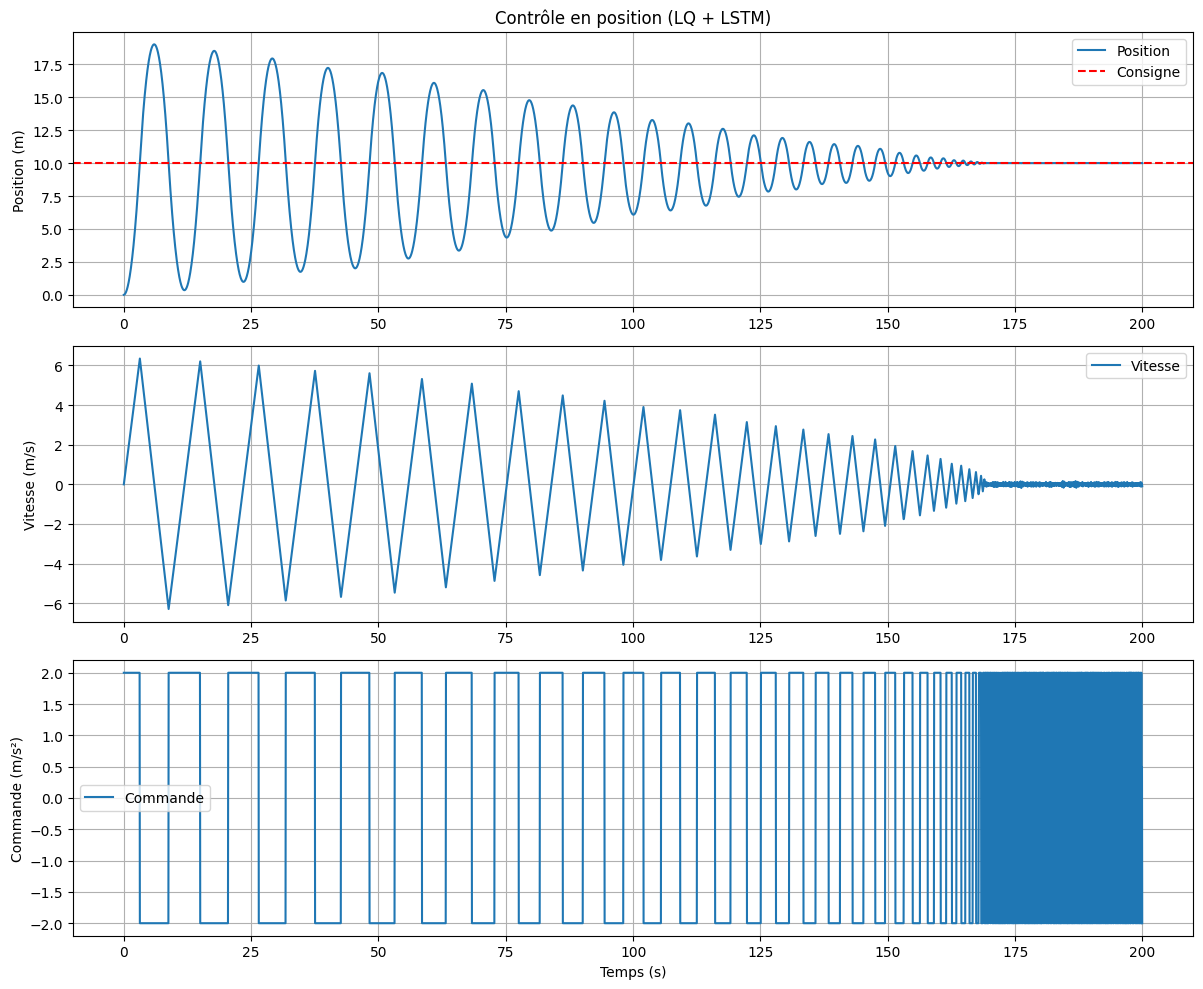

Position finale : 10.00 m
Erreur finale : 0.00 m
Vitesse finale : -0.09 m/s
Commande max : 2.00 m/s²
Dépassement max : 9.01 m


In [121]:
# Visualisation
plt.figure(figsize=(12, 10))
t = np.arange(len(trajectory)) * dt

plt.subplot(3,1,1)
plt.plot(t, trajectory[:,0], label="Position")
plt.axhline(target_height, color='r', linestyle='--', label='Consigne')
plt.grid(True)
plt.legend()
plt.title("Contrôle en position (LQ + LSTM)")
plt.ylabel("Position (m)")

plt.subplot(3,1,2)
plt.plot(t, trajectory[:,1], label="Vitesse")
plt.grid(True)
plt.legend()
plt.ylabel("Vitesse (m/s)")

plt.subplot(3,1,3)
plt.plot(t[:-1], commands, label="Commande")
plt.grid(True)
plt.legend()
plt.xlabel("Temps (s)")
plt.ylabel("Commande (m/s²)")

plt.tight_layout()
plt.show()

# Métriques de performance
print(f"Position finale : {trajectory[-1,0]:.2f} m")
print(f"Erreur finale : {abs(target_height - trajectory[-1,0]):.2f} m")
print(f"Vitesse finale : {trajectory[-1,1]:.2f} m/s")
print(f"Commande max : {np.max(np.abs(commands)):.2f} m/s²")
print(f"Dépassement max : {np.max(trajectory[:,0]) - target_height:.2f} m")